## Project 1 - Neural Network From Scratch

### Setup

In [484]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


### Code for Networks

#### Generating Training Set

In [455]:
def generate_training_set(num):
    np.random.seed(7)
    training_set = []
    for i in range(num):
       x = np.random.rand()
       y = 1 - x
       z = x * y

       training_set.append([x,y,z])  

    return training_set




#### Init Params

In [456]:
def init_params(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        params['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        params['b'+str(l)] = np.zeros((layer_dims[l], 1))
        
    return params

#### Activation Function

In [457]:
# Z (linear hypothesis) - Z = W*X + b , 
# W - weight matrix, b- bias vector, X- Input

def sigmoid(Z):
    A = 1/(1+np.exp(np.dot(-1, Z)))
    cache = (Z)
    
    return A, cache


#### Feed Forward

In [459]:
def feed_forward(X, params):
    
    A = X # input to first layer i.e. training data
    caches = []
    L = len(params)//2
    for l in range(1, L+1):
        A_prev = A
        
        # Linear Hypothesis
        Z = np.dot(params['W'+str(l)], A_prev) + params['b'+str(l)] 
        
        # Storing the linear cache
        linear_cache = (A_prev, params['W'+str(l)], params['b'+str(l)]) 
        
        # Applying sigmoid on linear hypothesis
        A, activation_cache = sigmoid(Z) 
        
         # storing the both linear and activation cache
        cache = (linear_cache, activation_cache)
        caches.append(cache)
    
    return A, caches

#### Cost Funtion

In [460]:
def cost_function(A, Y):
    m = Y.shape[1]
    
    # cost = (-1/m)*(np.dot(np.log(A), Y.T) + np.dot(np.log(1-A), 1-Y.T)) 
    cost = (1/2) * np.sum(np.square(np.subtract(A,Y)))
    
    return cost

#### Back Propagation

In [461]:
def one_layer_backward(dA, cache):
    linear_cache, activation_cache = cache
    
    Z = activation_cache
    dZ = dA*sigmoid(Z)[0]*(1-sigmoid(Z)[0]) # The derivative of the sigmoid function
    
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [462]:
def backprop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    # print(dAL, len(caches))
    
    current_cache = caches[L-1]
    grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = one_layer_backward(dAL, current_cache)
    
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = one_layer_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

        # print(grads)
        
    return grads

#### Update Parameters

In [463]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] -learning_rate*grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] -  learning_rate*grads['db'+str(l+1)]
        
    return parameters

#### Train Neural Network

In [464]:
def train(X, Y, layer_dims, epochs, lr):
    params = init_params(layer_dims)
    cost_history = []
    
    for i in range(epochs):
        Y_hat, caches = feed_forward(X, params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)        
        params = update_parameters(params, grads, lr)
        
        
    return params, cost_history
    # return params, Y_hat, caches, cost, grads

#### Root Mean Squared Error

In [538]:
def RMSE(Y_hat, Y):

    # print((1/len(Y)) * np.sum(np.square(np.subtract(Y_hat,Y))))

    error = np.sqrt((1/len(Y)) * np.sum(np.square(np.subtract(Y_hat,Y))))

    return error

### Building Networks

#### First model
<p> 2 input, 2 hidden layers with 100 neurons each, 1 output for a training set size of 100, 500 and 1000 with a 80/20 split</p>

In [557]:
training_set_1 = np.array(generate_training_set(100))
training_set_2 = np.array(generate_training_set(500))
training_set_3 = np.array(generate_training_set(1000))

In [558]:
print(len(training_set_1))
print(len(training_set_2))
print(len(training_set_3))

100
500
1000


In [559]:
X1 = training_set_1[0:80 , 0:2]
print('X1 :',len(X1))

X2 = training_set_2[0:400 , 0:2]
print('X2 :',len(X2))

X3 = training_set_3[0:800 , 0:2]
print('X3 :',len(X3))

X1 : 80
X2 : 400
X3 : 800


In [560]:
Y1 = training_set_1[0:80 , 2:3]
print('Y1 :',len(Y1))

Y2 = training_set_2[0:400 , 2:3]
print('Y2 :',len(Y2))

Y3 = training_set_3[0:800 , 2:3]
print('Y3 :',len(Y3))

Y1 : 80
Y2 : 400
Y3 : 800


In [562]:
layer_dims_1 = [2,100,100,1]

In [563]:
params1, cost_history1 = train(X1.T, Y1.T, layer_dims_1, 200, 0.01)
params2, cost_history2 = train(X2.T, Y2.T, layer_dims_1, 200, 0.01)
params3, cost_history3 = train(X3.T, Y3.T, layer_dims_1, 200, 0.01)

##### Training Set 1

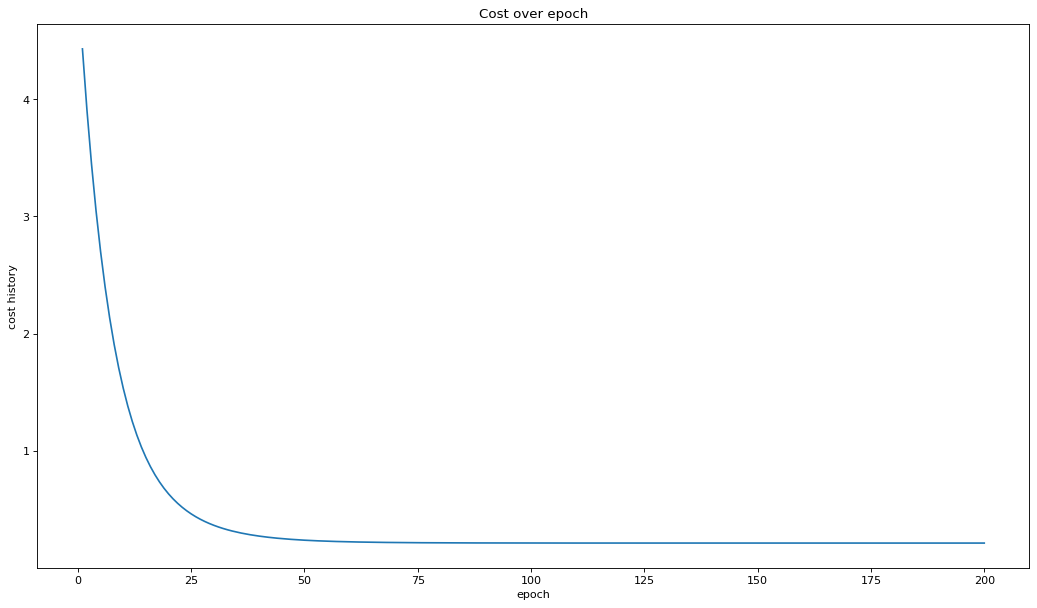

In [564]:
# Cost History Graph
x = []
for i in range(len(cost_history1)):
    x.append(i + 1)
x = np.array(x)

y = np.array(cost_history1)
figure(figsize=(16, 9), dpi=80)



plt.plot(x, y)
plt.xlabel("epoch")
plt.ylabel("cost history")
plt.title("Cost over epoch")
plt.show()

In [565]:
X1_val = training_set_1[80:100 , 0:2]
print('X1_val :',len(X1_val))

Y1_val = training_set_1[80:100 , 2:3]
print('Y1_val :',len(Y1_val))

Y_hat1, caches1 = feed_forward(X1_val.T, params1)

error = RMSE(Y_hat1, Y1_val)

print('Root Mean Squared Error :', error)

X1_val : 20
Y1_val : 20
Root Mean Squared Error : 0.2824088467500546


##### Training Set 2

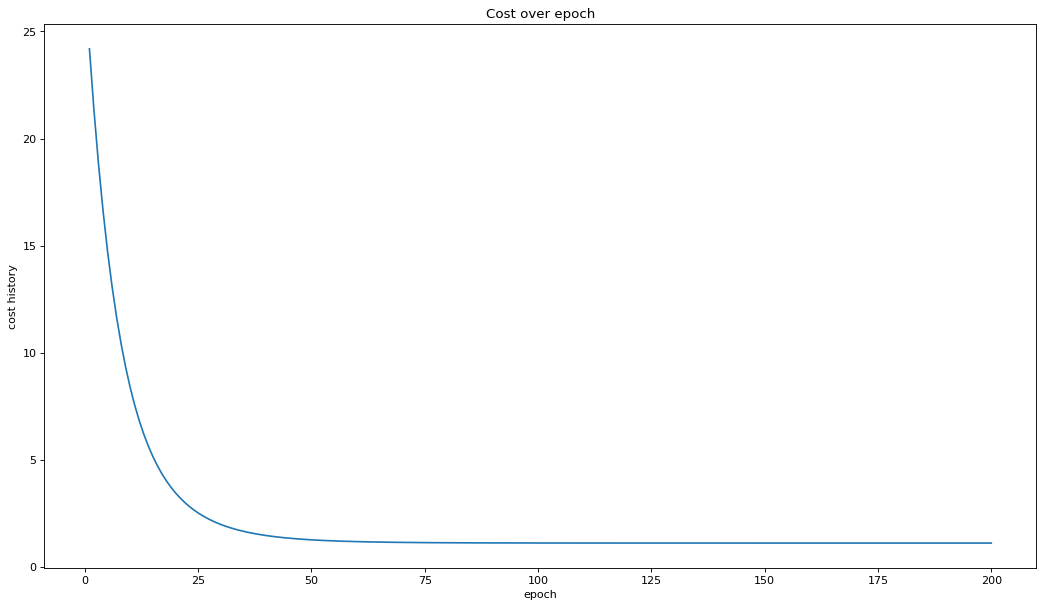

In [566]:
# Cost History Graph
x = []
for i in range(len(cost_history2)):
    x.append(i + 1)
x = np.array(x)

y = np.array(cost_history2)
figure(figsize=(16, 9), dpi=80)



plt.plot(x, y)
plt.xlabel("epoch")
plt.ylabel("cost history")
plt.title("Cost over epoch")
plt.show()

In [567]:
X2_val = training_set_2[400:500 , 0:2]
print('X2_val :',len(X2_val))

Y2_val = training_set_2[400:500 , 2:3]
print('Y2_val :',len(Y2_val))

Y_hat2, caches2 = feed_forward(X2_val.T, params2)

error = RMSE(Y_hat2, Y2_val)

print('Root Mean Squared Error :', error)

X2_val : 100
Y2_val : 100
Root Mean Squared Error : 0.7559463174055078


##### Training Set 3

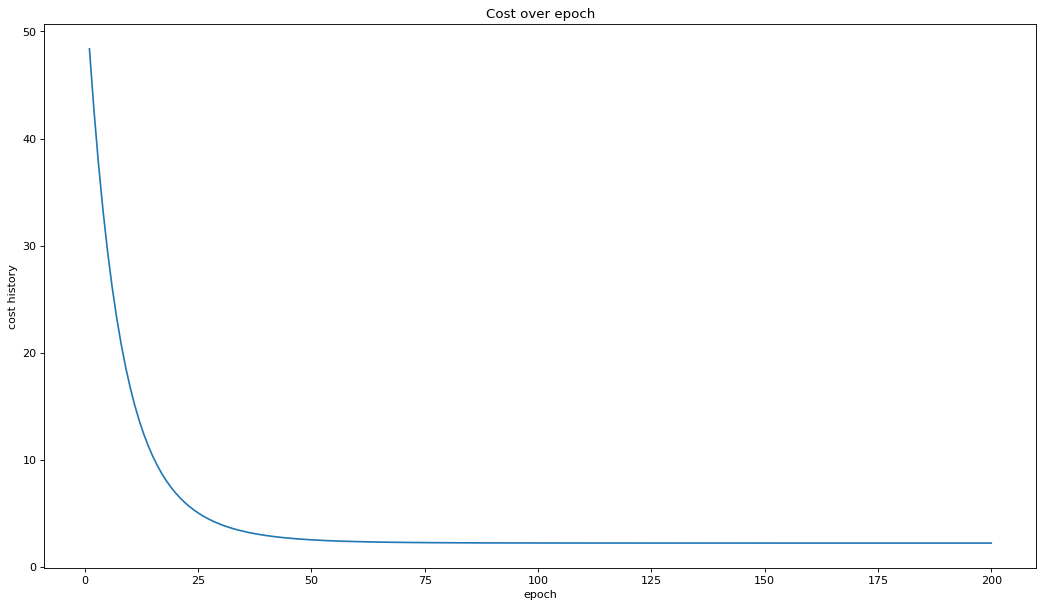

In [568]:
# Cost History Graph
x = []
for i in range(len(cost_history3)):
    x.append(i + 1)
x = np.array(x)

y = np.array(cost_history3)
figure(figsize=(16, 9), dpi=80)



plt.plot(x, y)
plt.xlabel("epoch")
plt.ylabel("cost history")
plt.title("Cost over epoch")
plt.show()

In [569]:
X3_val = training_set_3[800:1000 , 0:2]
print('X3_val :',len(X3_val))

Y3_val = training_set_3[800:1000 , 2:3]
print('Y3_val :',len(Y3_val))

Y_hat3, caches3 = feed_forward(X3_val.T, params3)

error = RMSE(Y_hat3, Y3_val)

print('Root Mean Squared Error :', error)

X3_val : 200
Y3_val : 200
Root Mean Squared Error : 1.0287131272638848


#### Second model
<p> 2 input, 2 hidden layers with 100 neurons each, 1 output for a training set size of 500 with a 80/20 split but changing epoch from 100, 500 and 1000</p>

In [570]:
training_set_4 = np.array(generate_training_set(500))
print(len(training_set_4))

500


In [571]:
X4 = training_set_4[0:400 , 0:2]
print('X4 :',len(X4))

X4_val = training_set_4[400:500 , 0:2]
print('X4_val :',len(X4_val))

X4 : 400
X4_val : 100


In [572]:
Y4 = training_set_4[0:400 , 2:3]
print('Y4 :',len(Y4))

Y4_val = training_set_4[400:500 , 2:3]
print('Y4_val :',len(Y4_val))

Y4 : 400
Y4_val : 100


In [573]:
layer_dims_2 = [2,100,100,1]

In [574]:
params4, cost_history4 = train(X4.T, Y4.T, layer_dims_1, 100, 0.01)
params5, cost_history5 = train(X4.T, Y4.T, layer_dims_1, 500, 0.01)
params6, cost_history6 = train(X4.T, Y4.T, layer_dims_1, 1000, 0.01)

##### Set 1

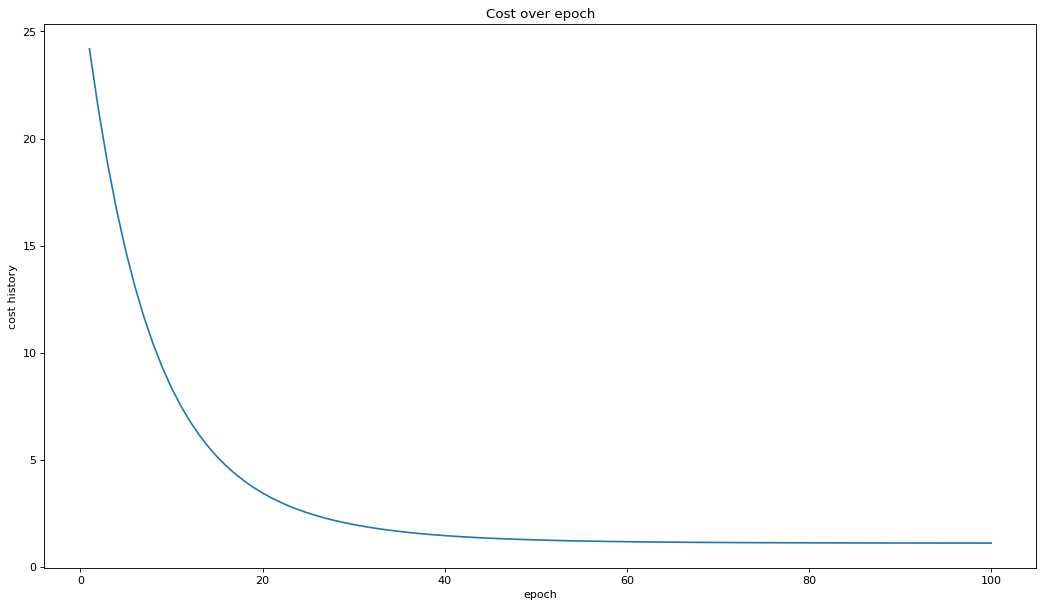

In [585]:
# Cost History Graph
x = []
for i in range(len(cost_history4)):
    x.append(i + 1)
x = np.array(x)

y = np.array(cost_history4)
figure(figsize=(16, 9), dpi=80)



plt.plot(x, y)
plt.xlabel("epoch")
plt.ylabel("cost history")
plt.title("Cost over epoch")
plt.show()

In [586]:
Y_hat4, caches4 = feed_forward(X4_val.T, params4)

error = RMSE(Y_hat4, Y4_val)

print('Root Mean Squared Error :', error)

Root Mean Squared Error : 0.7578816561948457


##### Set 2

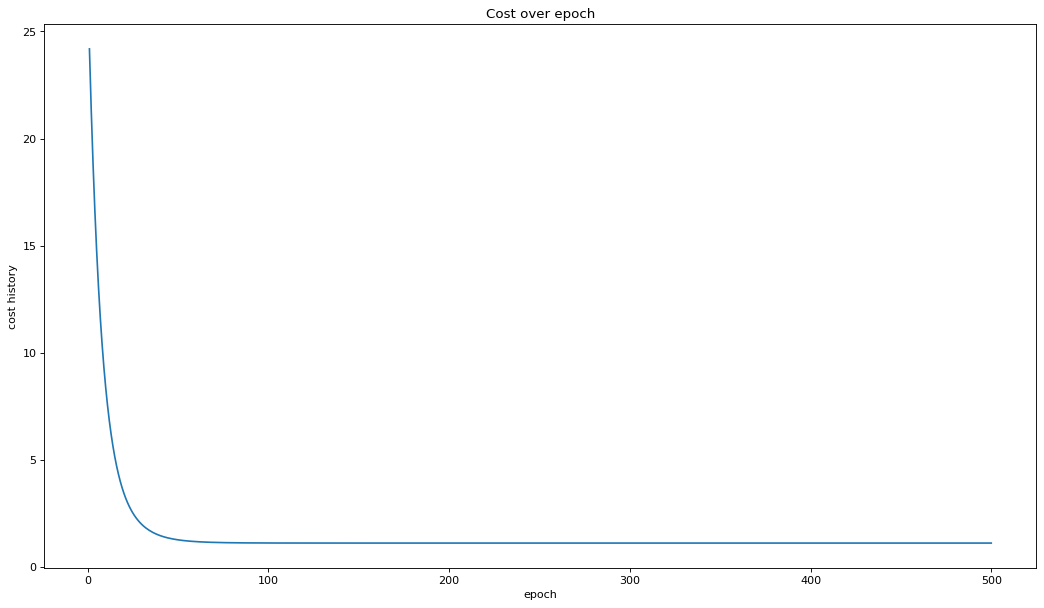

In [583]:
# Cost History Graph
x = []
for i in range(len(cost_history5)):
    x.append(i + 1)
x = np.array(x)

y = np.array(cost_history5)
figure(figsize=(16, 9), dpi=80)



plt.plot(x, y)
plt.xlabel("epoch")
plt.ylabel("cost history")
plt.title("Cost over epoch")
plt.show()  

In [584]:
Y_hat5, caches5 = feed_forward(X4_val.T, params5)

error = RMSE(Y_hat5, Y4_val)

print('Root Mean Squared Error :', error)

Root Mean Squared Error : 0.7559205606503833


##### Set 3

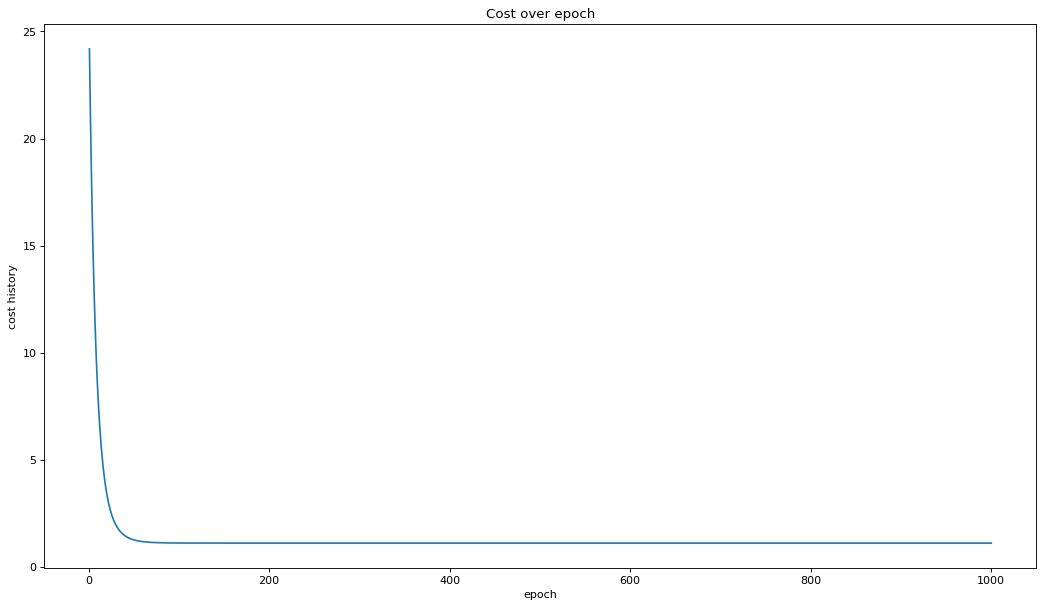

In [581]:
# Cost History Graph
x = []
for i in range(len(cost_history6)):
    x.append(i + 1)
x = np.array(x)

y = np.array(cost_history6)
figure(figsize=(16, 9), dpi=80)



plt.plot(x, y)
plt.xlabel("epoch")
plt.ylabel("cost history")
plt.title("Cost over epoch")
plt.show()

In [582]:
Y_hat6, caches6 = feed_forward(X4_val.T, params6)

error = RMSE(Y_hat6, Y4_val)

print('Root Mean Squared Error :', error)

Root Mean Squared Error : 0.7559205602405676
